In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [175]:
# Load dataset
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [176]:
df.info()
# No null_values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [177]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [178]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [179]:
df.duplicated().sum()

0

In [180]:
# analysis categorical data
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(df[col].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Over18
Y    1470
Name: count,

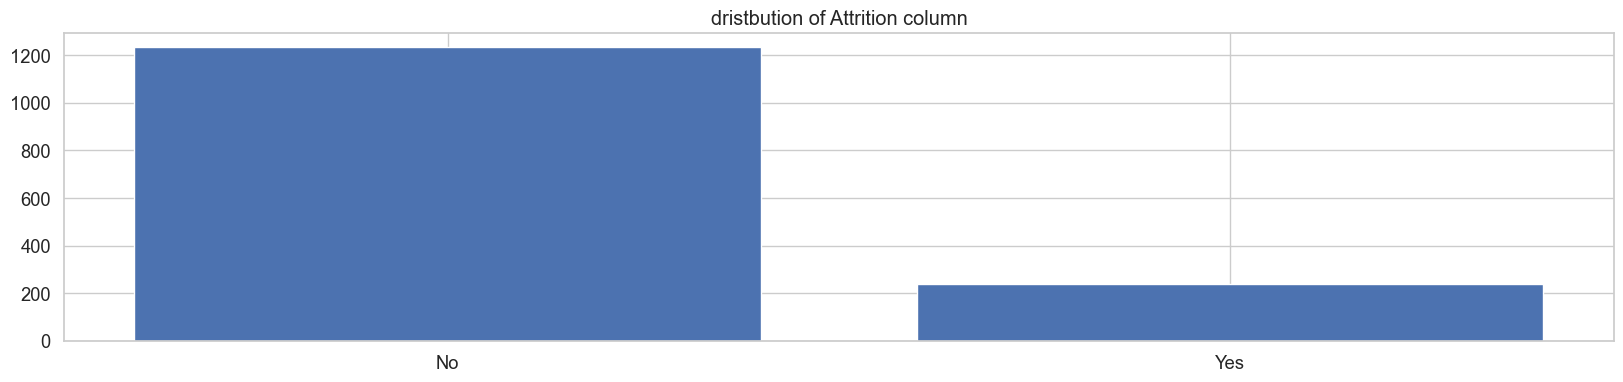

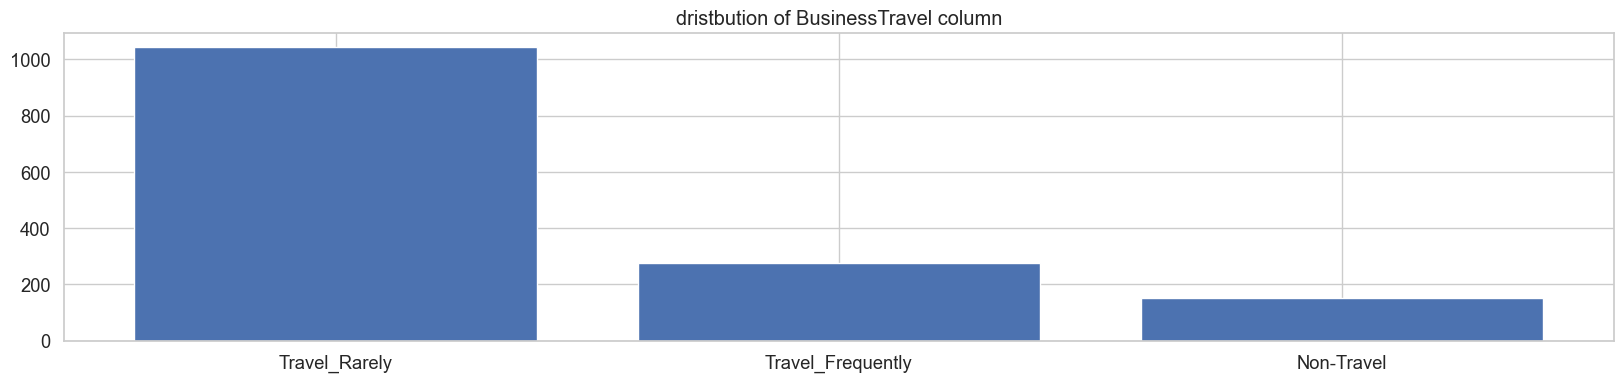

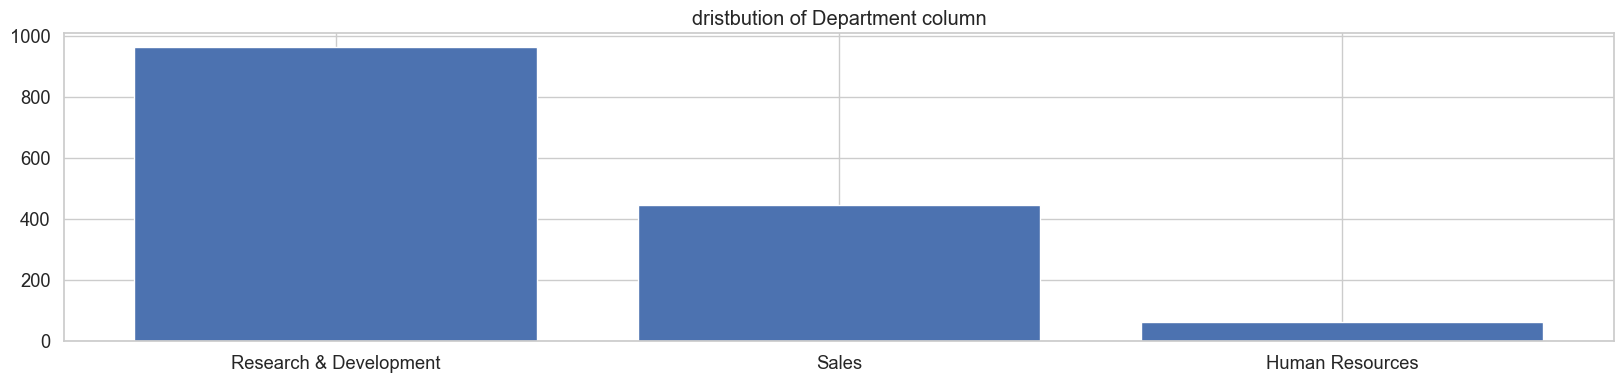

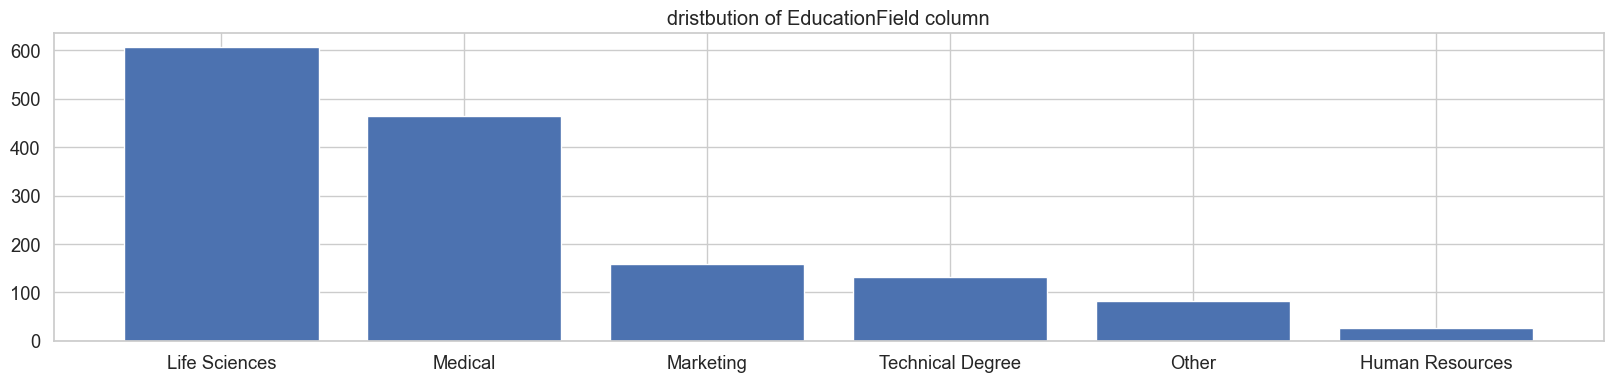

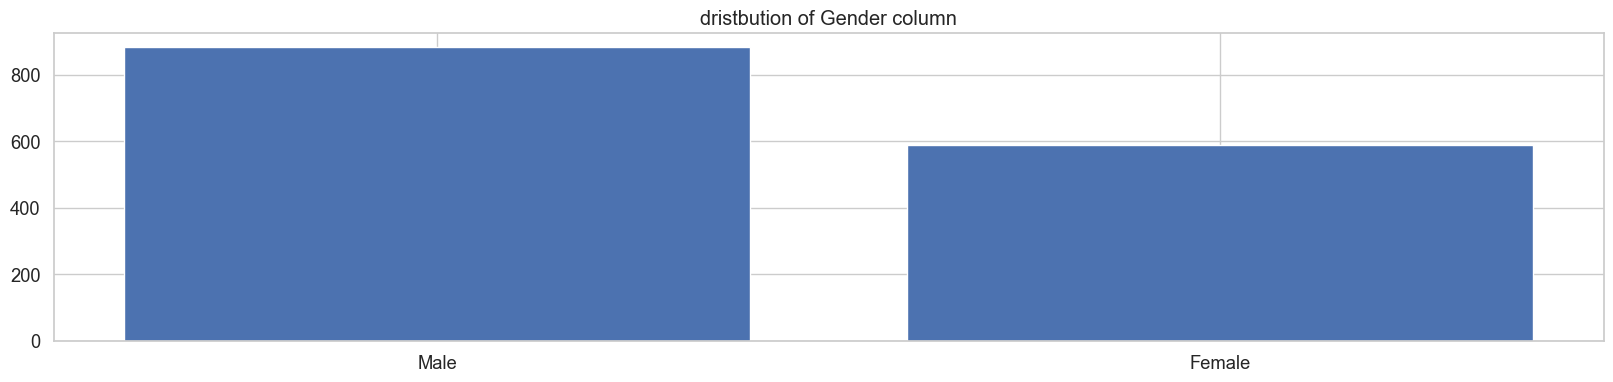

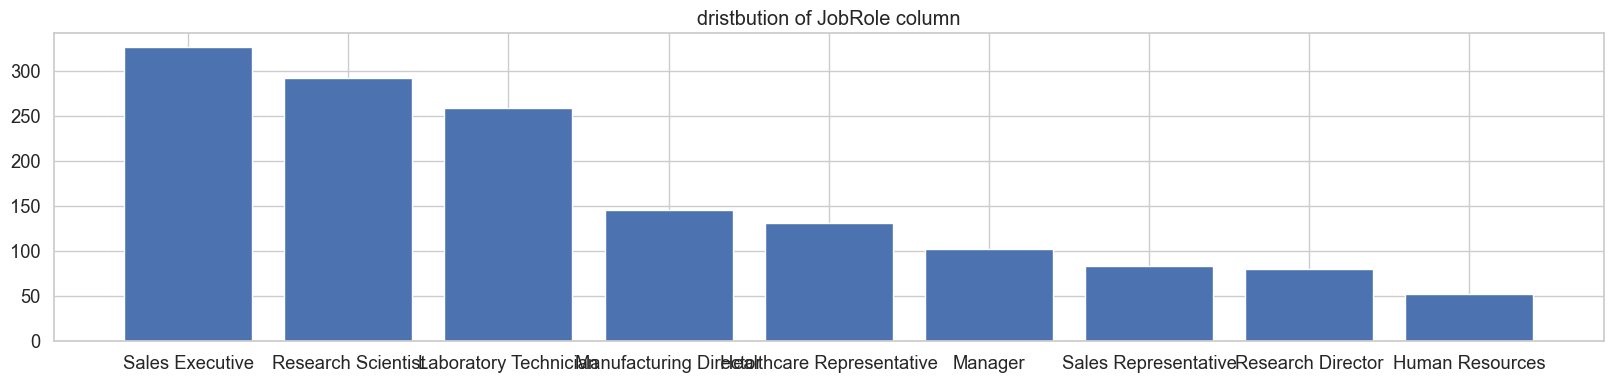

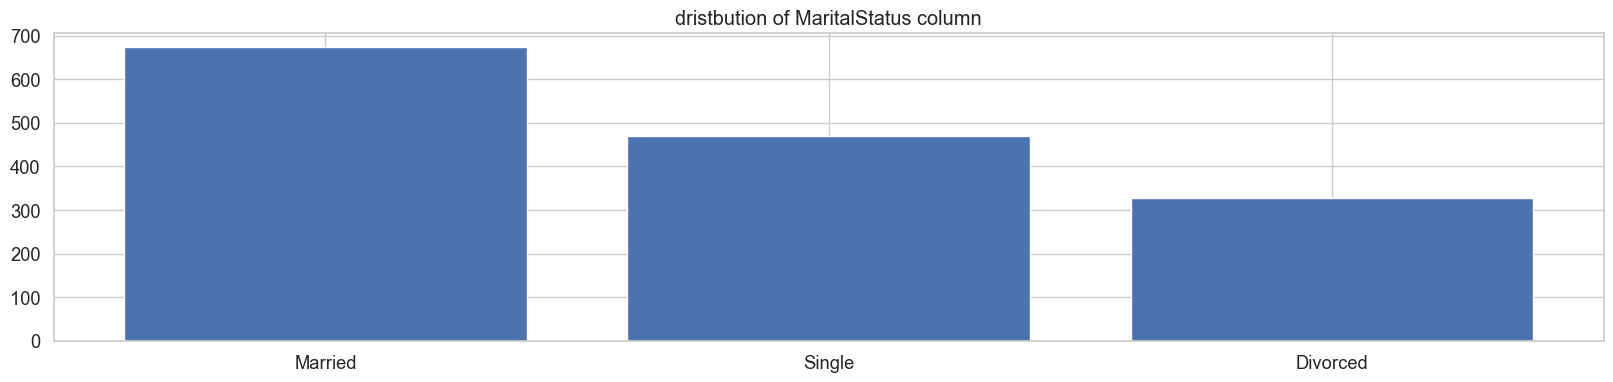

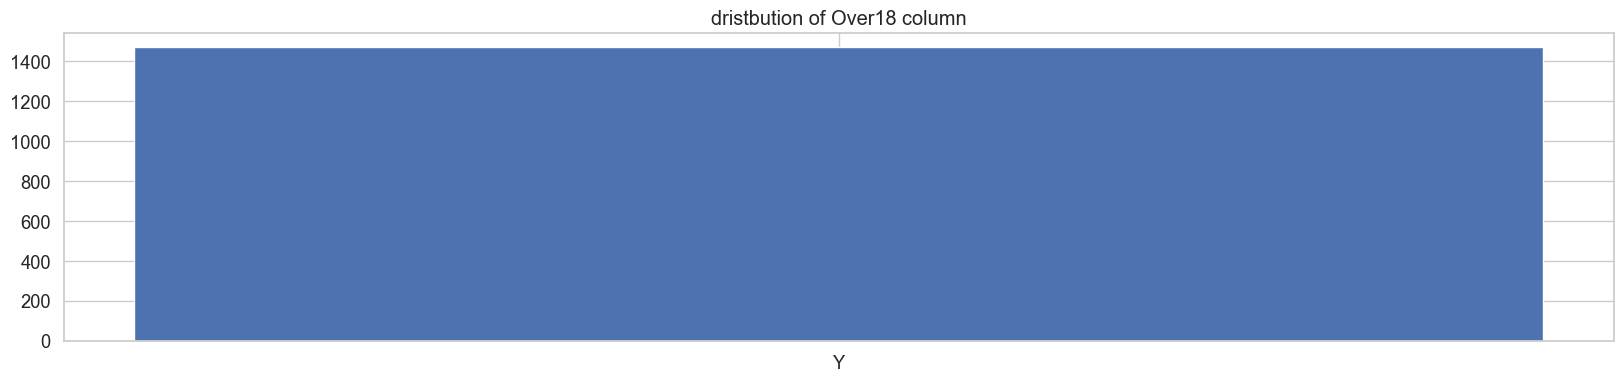

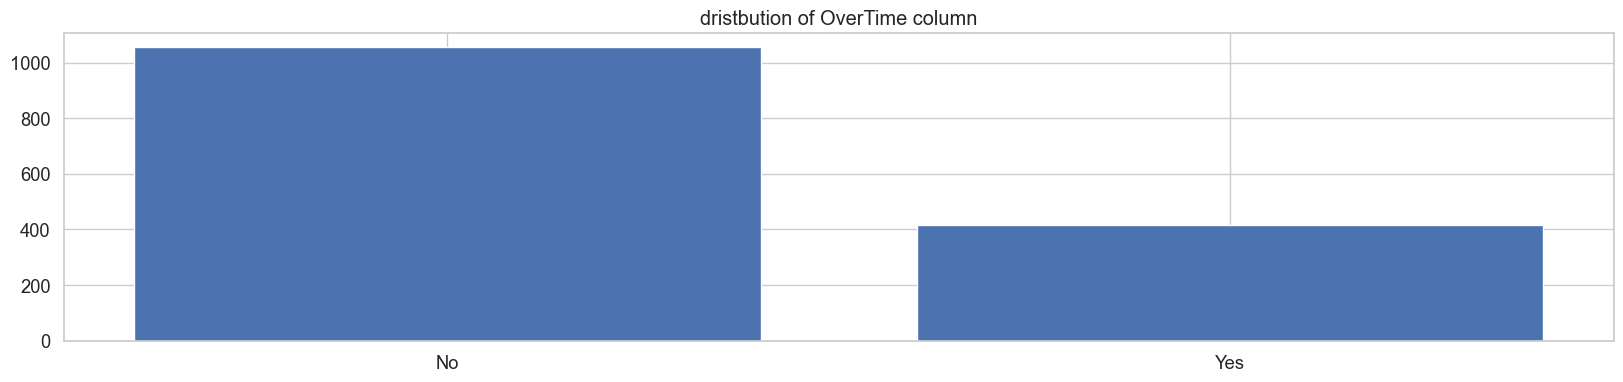

In [181]:
#show categorical data
for col in cat_cols:
    plt.figure(figsize=(20,4))
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.title(f"dristbution of {col} column")
    plt.show()

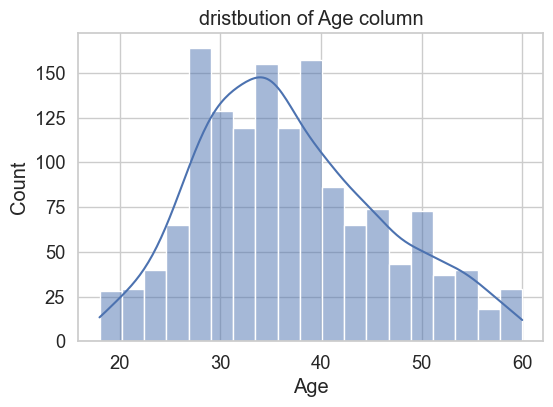

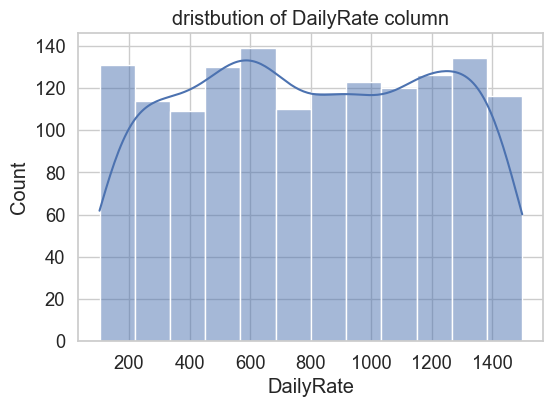

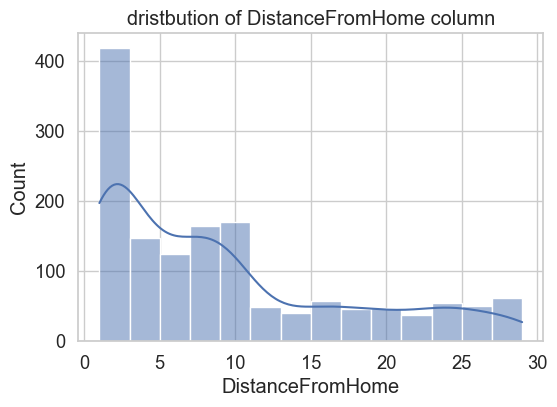

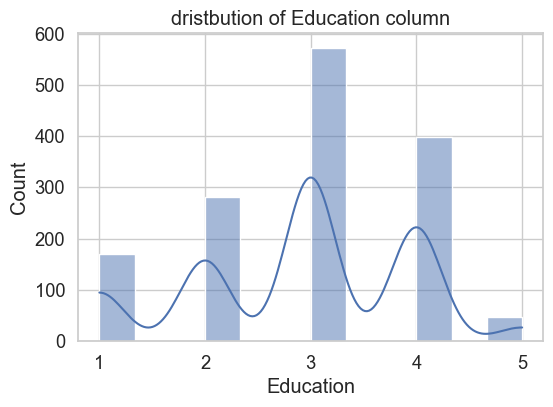

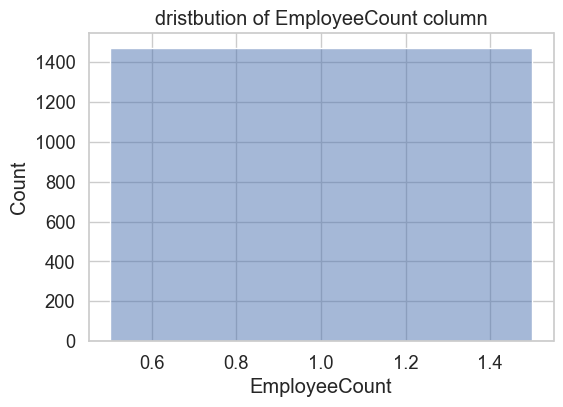

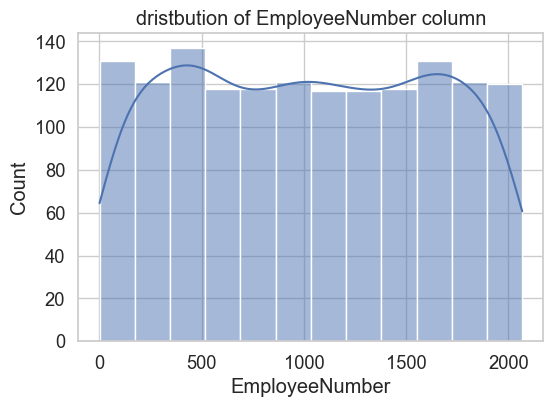

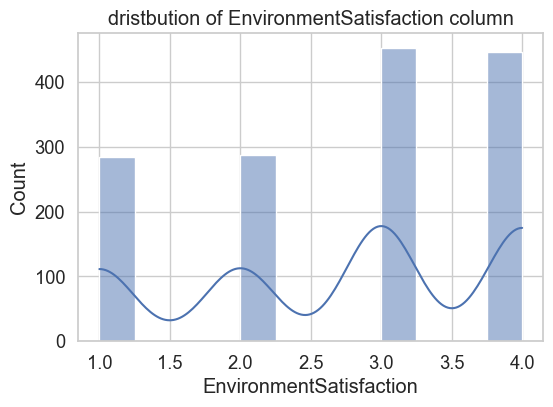

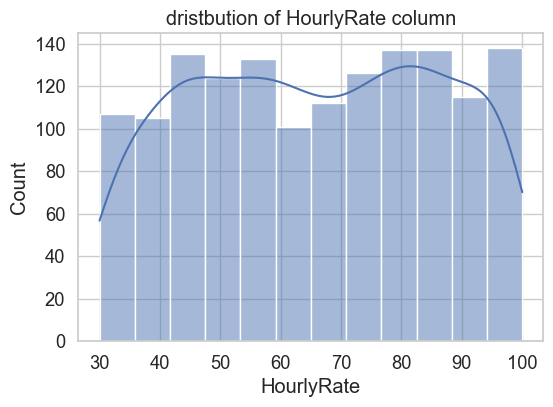

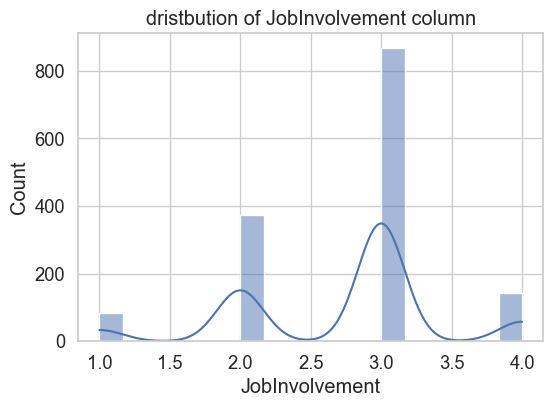

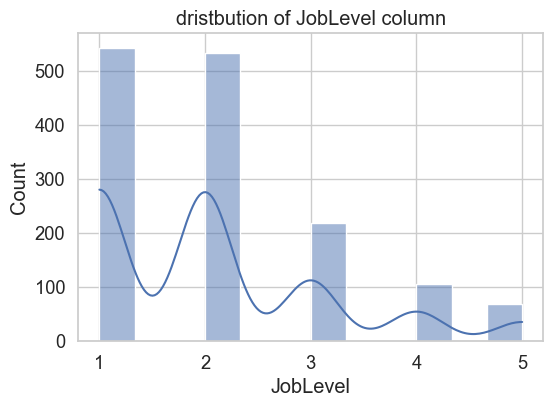

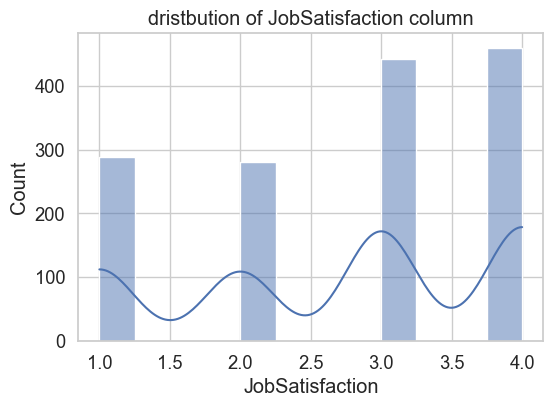

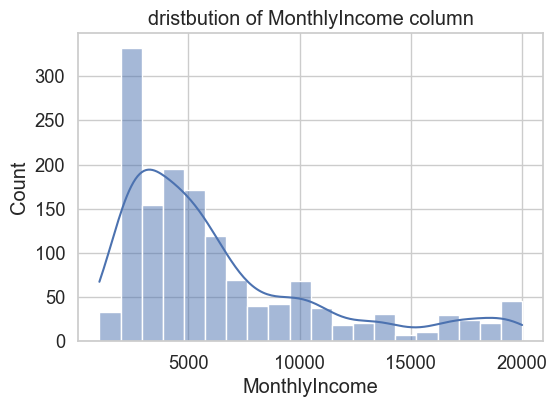

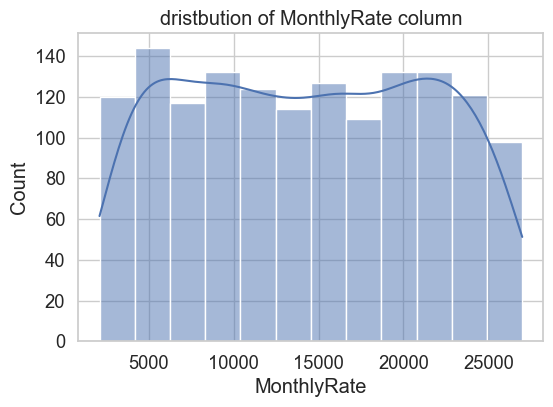

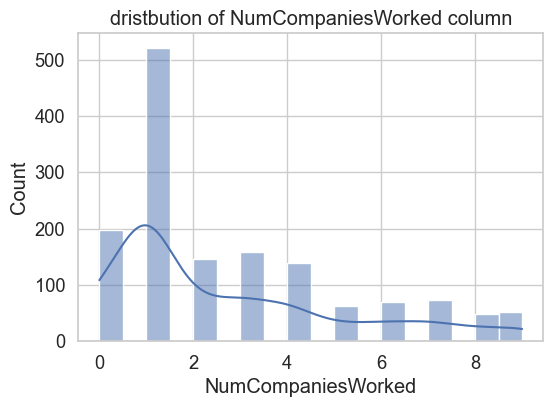

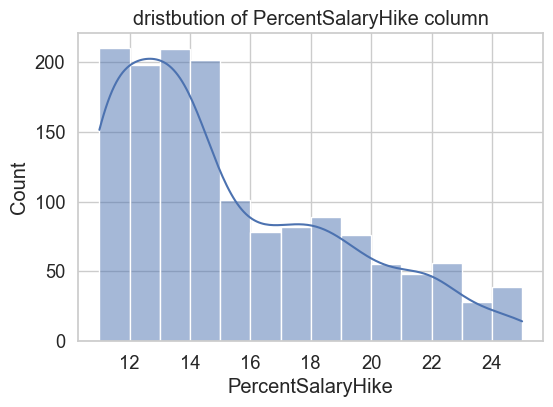

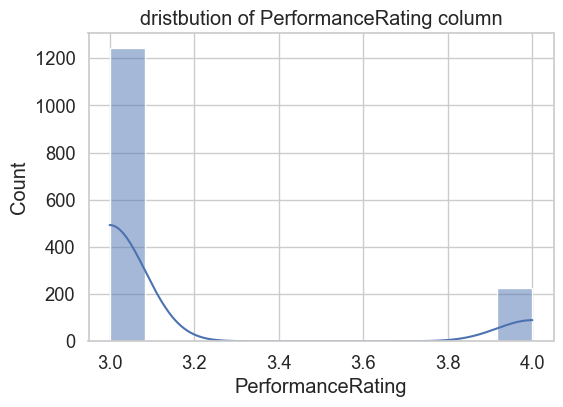

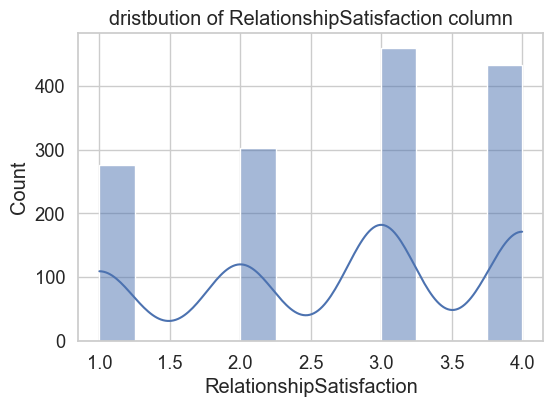

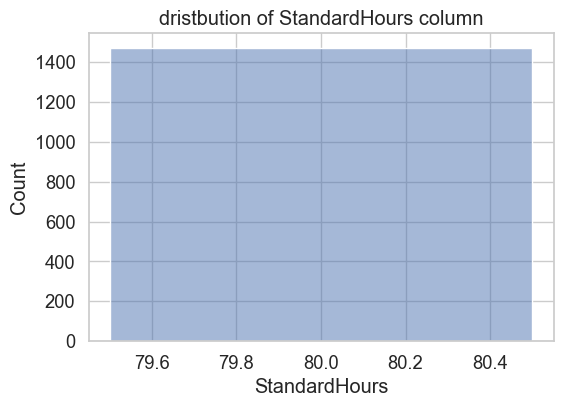

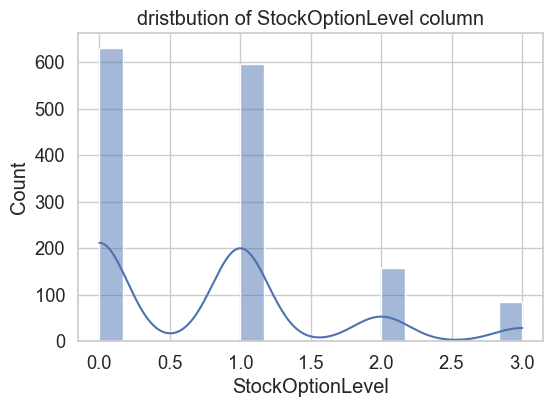

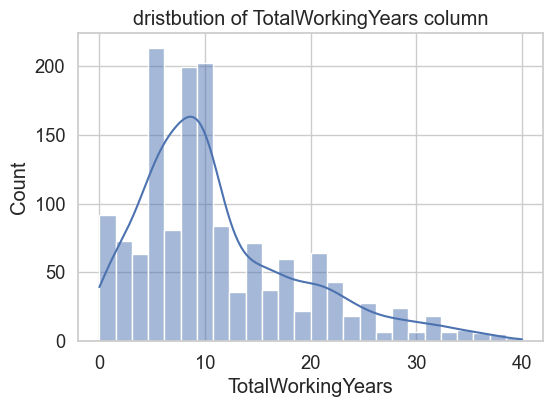

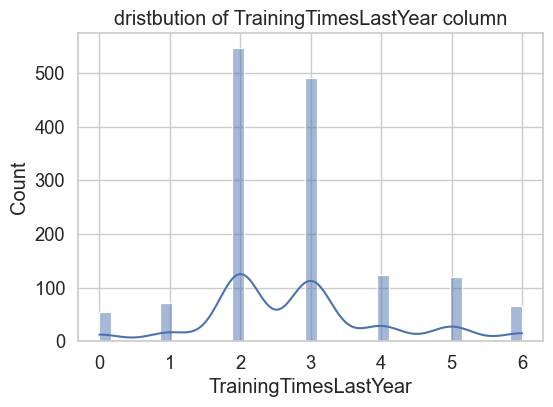

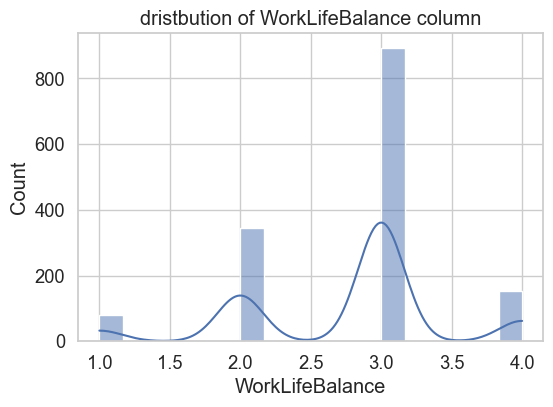

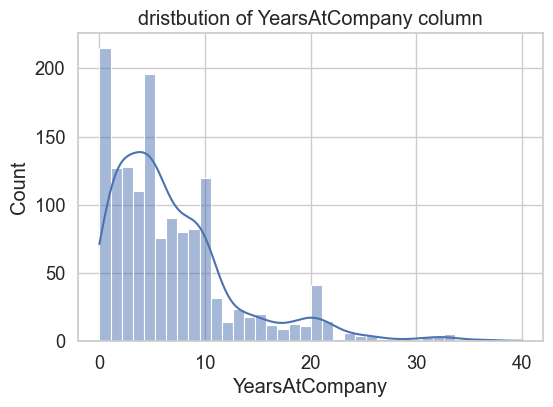

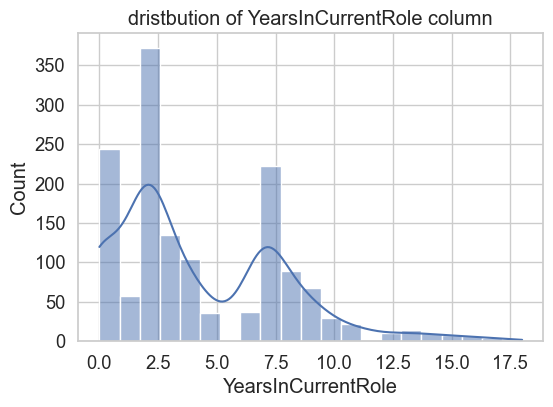

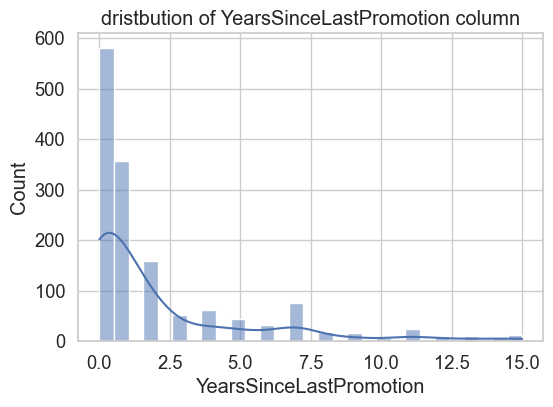

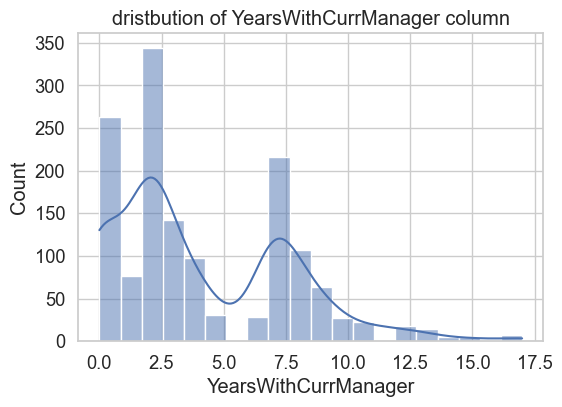

In [182]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# show numerical data
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"dristbution of {col} column")
    plt.show()

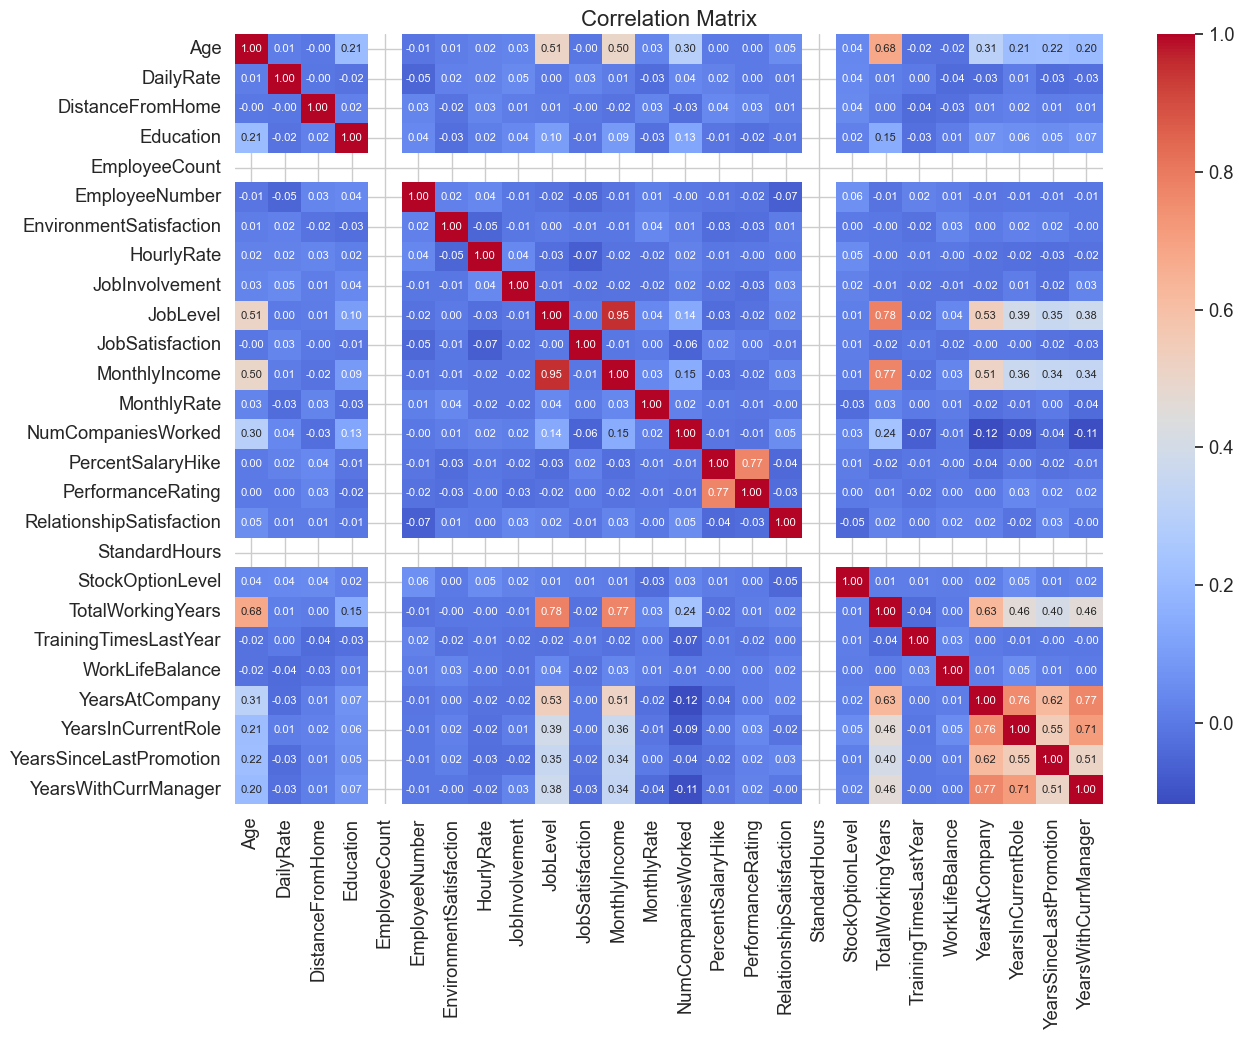

In [183]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df.select_dtypes(include=['number']).corr(),
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cmap="coolwarm"
)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [184]:
#sns.pairplot(df)
#plt.show()

In [185]:
def analyze_group(df, columns, group_name):
    """
    Visualize and describe categorical distributions for a feature group.
    """
    print(f"\n{'='*80}")
    print(f" ANALYSIS — {group_name}")
    print(f"{'='*80}\n")

    sns.set(style='whitegrid', font_scale=1.2)

    for col in columns:
        temp_series = df[col].fillna('Missing')
        value_counts = temp_series.value_counts()

        # --- Visualization ---
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        fig.suptitle(f"Distribution of '{col}'", fontsize=17, fontweight='bold')

        sns.countplot(
            data=df, x=col, order=value_counts.index,
            palette='YlGnBu', ax=axes[0], edgecolor='black'
        )
        axes[0].set_title(f'Count of {col}', fontsize=14, fontweight='semibold')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', linestyle='--', alpha=0.6)

        for p in axes[0].patches:
            axes[0].annotate(f"{int(p.get_height())}",
                             (p.get_x() + p.get_width()/2., p.get_height()),
                             ha='center', va='bottom', fontsize=10)

        value_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axes[1],
            colors=sns.color_palette('rocket', len(value_counts)),
            startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}
        )
        axes[1].set_ylabel('')
        axes[1].set_title(f'Percentage Share of {col}', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


 ANALYSIS — Group 1 - Attrition, Gender , Department



C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\2820699689.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


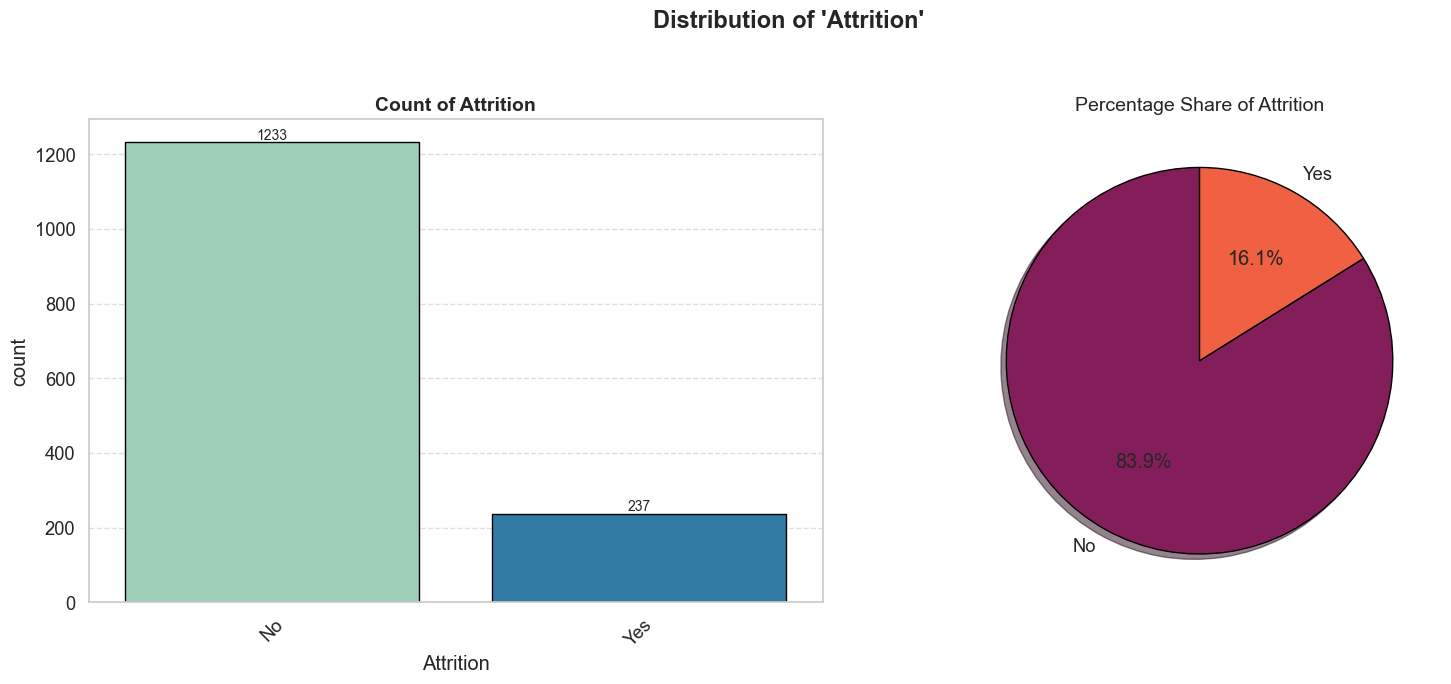

C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\2820699689.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


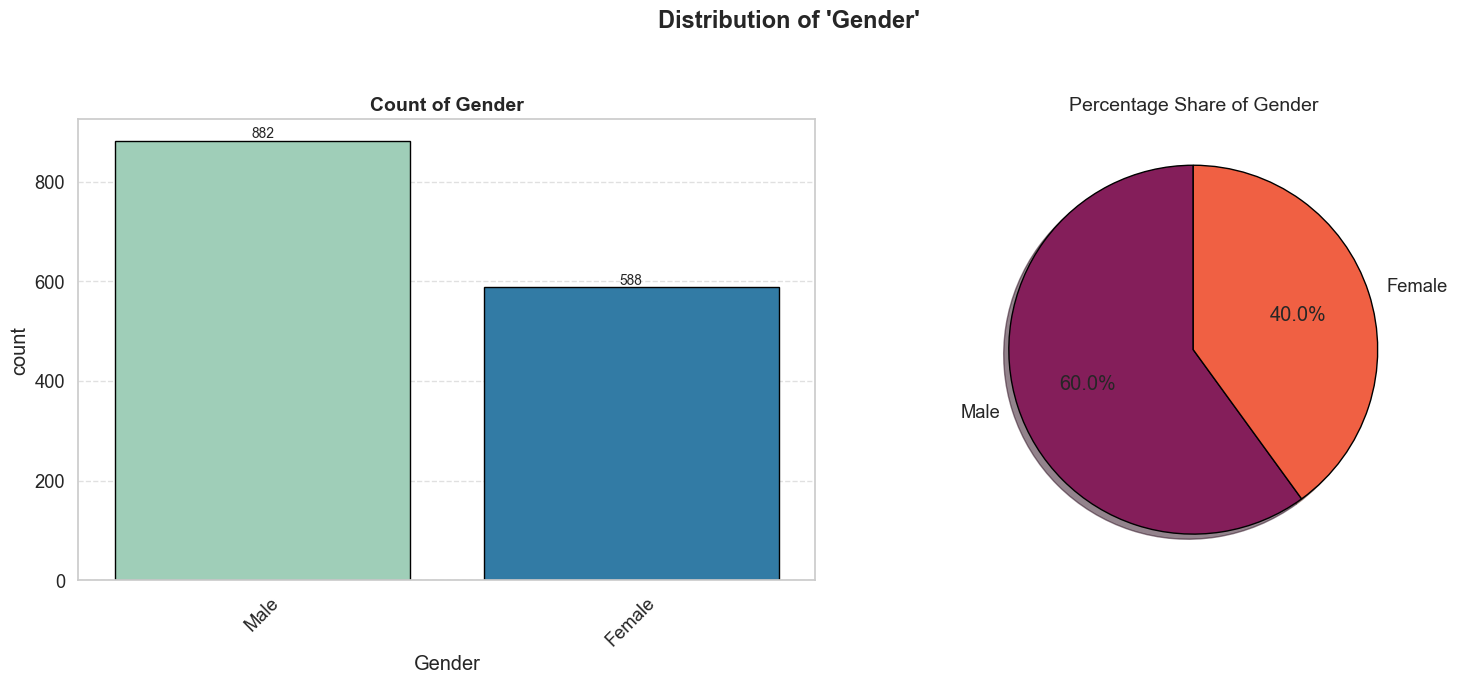

C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\2820699689.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


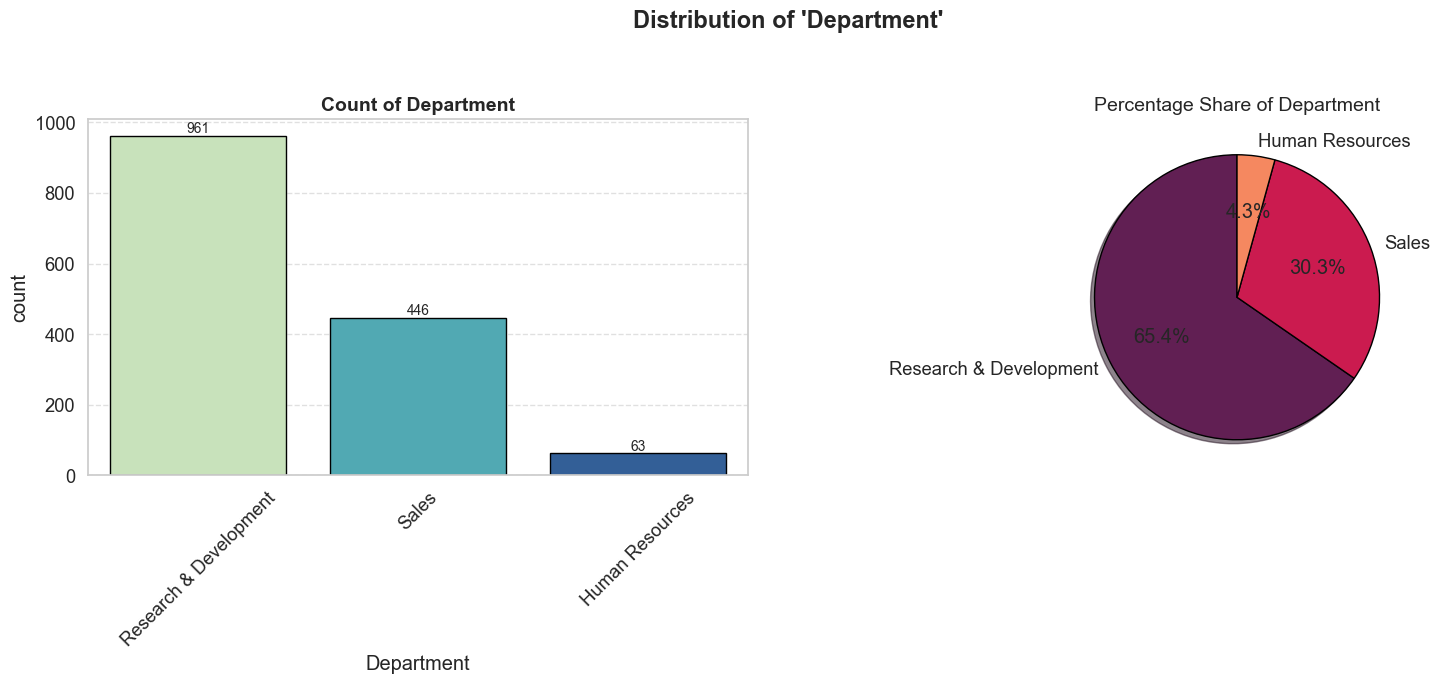

In [186]:
group1_cols = ['Attrition', 'Gender', 'Department']
analyze_group(df, group1_cols, group_name="Group 1 - Attrition, Gender , Department")

In [187]:
constant_col = ['EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=constant_col , inplace=True)

In [188]:
df.drop(['EmployeeNumber'], axis= 1, inplace=True)
# Has no effect on model just ID

In [189]:
def outliers(col, df_local):
    if col not in df_local.columns:
        return None
    if not np.issubdtype(df_local[col].dtype, np.number):
        return None
    Q1 = df_local[col].quantile(0.25)
    Q3 = df_local[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    iqr_count = int(((df_local[col] < low) | (df_local[col] > high)).sum())
    series = df_local[col]
    z = np.abs(stats.zscore(series))
    z_count = int((z > 3.0).sum())

    return {
        'iqr_outliers': iqr_count,
        'z_outliers': z_count,
        'iqr_low': float(low),
        'iqr_high': float(high)
    }
num_cols_current = df.select_dtypes(include=['number']).columns.tolist()
num_summary = {c: outliers(c, df) for c in num_cols_current}
outlier_df = pd.DataFrame(num_summary)
display(outlier_df)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
iqr_outliers,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,114.0,...,226.0,0.0,85.0,63.0,238.0,0.0,104.0,21.0,107.0,14.0
z_outliers,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,25.0,13.0,42.0,14.0
iqr_low,10.5,-573.0,-16.0,-1.0,-1.0,-5.625,0.5,-2.0,-1.0,-5291.0,...,3.0,-1.0,-1.5,-7.5,0.5,0.5,-6.0,-5.5,-4.5,-5.5
iqr_high,62.5,2195.0,32.0,7.0,7.0,137.375,4.5,6.0,7.0,16581.0,...,3.0,7.0,2.5,28.5,4.5,4.5,18.0,14.5,7.5,14.5


In [190]:
cap_cols = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','StockOptionLevel',
            'NumCompaniesWorked','TrainingTimesLastYear']
capped_info = {}
for c in cap_cols:
    if c not in df.columns:
        continue
    arr = df[c].dropna()
    z = np.abs(stats.zscore(arr))
    n_extreme = int((z > 3.0).sum())
    mean = arr.mean(); std = arr.std()
    upper = mean + 3.0 * std
    lower = mean - 3.0 * std
    df.loc[df[c] > upper, c] = upper
    df.loc[df[c] < lower, c] = lower
    capped_info[c] = {'capped_count': n_extreme, 'upper': float(upper), 'lower': float(lower)}
print("Capped info:", capped_info)

Capped info: {'MonthlyIncome': {'capped_count': 0, 'upper': 20626.80164181099, 'lower': -7620.939056776975}, 'TotalWorkingYears': {'capped_count': 16, 'upper': 34.621936863279686, 'lower': -12.062753189810296}, 'YearsAtCompany': {'capped_count': 25, 'upper': 25.38773872251683, 'lower': -11.371412191904582}, 'YearsInCurrentRole': {'capped_count': 13, 'upper': 15.098662804692157, 'lower': -6.640159403331613}, 'YearsSinceLastPromotion': {'capped_count': 42, 'upper': 11.855045939454717, 'lower': -7.479535735373085}, 'YearsWithCurrManager': {'capped_count': 14, 'upper': 14.827537613321994, 'lower': -6.581279109920633}, 'StockOptionLevel': {'capped_count': 0, 'upper': 3.350107554812922, 'lower': -1.762352452772106}, 'NumCompaniesWorked': {'capped_count': 0, 'upper': 10.187224297123805, 'lower': -4.800829739300677}, 'TrainingTimesLastYear': {'capped_count': 0, 'upper': 6.667131590278693, 'lower': -1.0684921344963803}}


C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\3077694733.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20626.80164181099' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[c] > upper, c] = upper
C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\3077694733.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.621936863279686' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[c] > upper, c] = upper
C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\3077694733.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.38773872251683' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[c] > upper, c]

In [191]:
# Normalize categorical strings
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

In [192]:
if 'MonthlyIncome' in df.columns and 'TotalWorkingYears' in df.columns: df['IncomePerYearExperience'] = df['MonthlyIncome'] / (df['TotalWorkingYears'])
df['IncomePerYearExperience'] = df['IncomePerYearExperience']
df.shape

(1470, 32)

In [193]:
print(df.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomePerYearExperience']


In [194]:
# Categorical (Nominal) Columns
cat_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]
# One-hot encode nominal categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Ordinal Columns
ord_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'PerformanceRating',
    'RelationshipSatisfaction', 'WorkLifeBalance'
]
df[ord_cols] = df[ord_cols].astype(int)

# Feature Engineering (safe)
df['TenureRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears'].replace(0, np.nan)
df['YearsSincePromotionRatio'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany'].replace(0, np.nan)
df['IncomePerYear'] = df['MonthlyIncome'] * 12
df['IncomeToAge'] = df['MonthlyIncome'] / df['Age'].replace(0, np.nan)
df['WorkLifeScore'] = df['WorkLifeBalance'] * df['JobSatisfaction']

# Replace infinite and NaN values with 0 (or you can use mean if preferred)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Encode Target Variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Final check
print("Sample data:\n", df.head(3))


Sample data:
    Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   

   JobSatisfaction  ...  JobRole_Sales Executive  \
0                4  ...                     True   
1                2  ...                    False   
2                3  ...                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                  

In [195]:
df.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,TenureRatio,YearsSincePromotionRatio,IncomePerYear,IncomeToAge,WorkLifeScore
0,41,1,1102,1,2,2,94,3,2,4,...,True,False,False,True,True,0.750000,0.000000,71916.0,146.170732,4
1,49,0,279,8,1,3,61,2,2,2,...,False,False,True,False,False,1.000000,0.100000,61560.0,104.693878,6
2,37,1,1373,2,2,4,92,2,1,3,...,False,False,False,True,True,0.000000,0.000000,25080.0,56.486486,9
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,True,False,True,1.000000,0.375000,34908.0,88.151515,9
4,27,0,591,2,1,1,40,3,1,2,...,False,False,True,False,False,0.333333,1.000000,41616.0,128.444444,6
5,32,0,1005,2,2,4,79,3,1,4,...,False,False,False,True,False,0.875000,0.428571,36816.0,95.875000,8
6,59,0,1324,3,3,3,81,4,1,1,...,False,False,True,False,True,0.083333,0.000000,32040.0,45.254237,2
7,30,0,1358,24,1,4,67,3,1,3,...,False,False,False,False,False,1.000000,0.000000,32316.0,89.766667,9
8,38,0,216,23,3,4,44,2,3,3,...,False,False,False,True,False,0.900000,0.111111,114312.0,250.684211,9
9,36,0,1299,27,3,3,94,3,2,3,...,False,False,True,False,False,0.411765,1.000000,62844.0,145.472222,6


In [196]:
engineered_cols = [
    'TenureRatio', 'IncomePerYear', 'IncomeToAge',
    'YearsSincePromotionRatio', 'WorkLifeScore', 'IncomePerYearExperience'
]
encoded_cols = [col for col in df.columns if any(prefix in col for prefix in cat_cols)]
analysis_cols = encoded_cols + engineered_cols
df_analysis = df[analysis_cols]

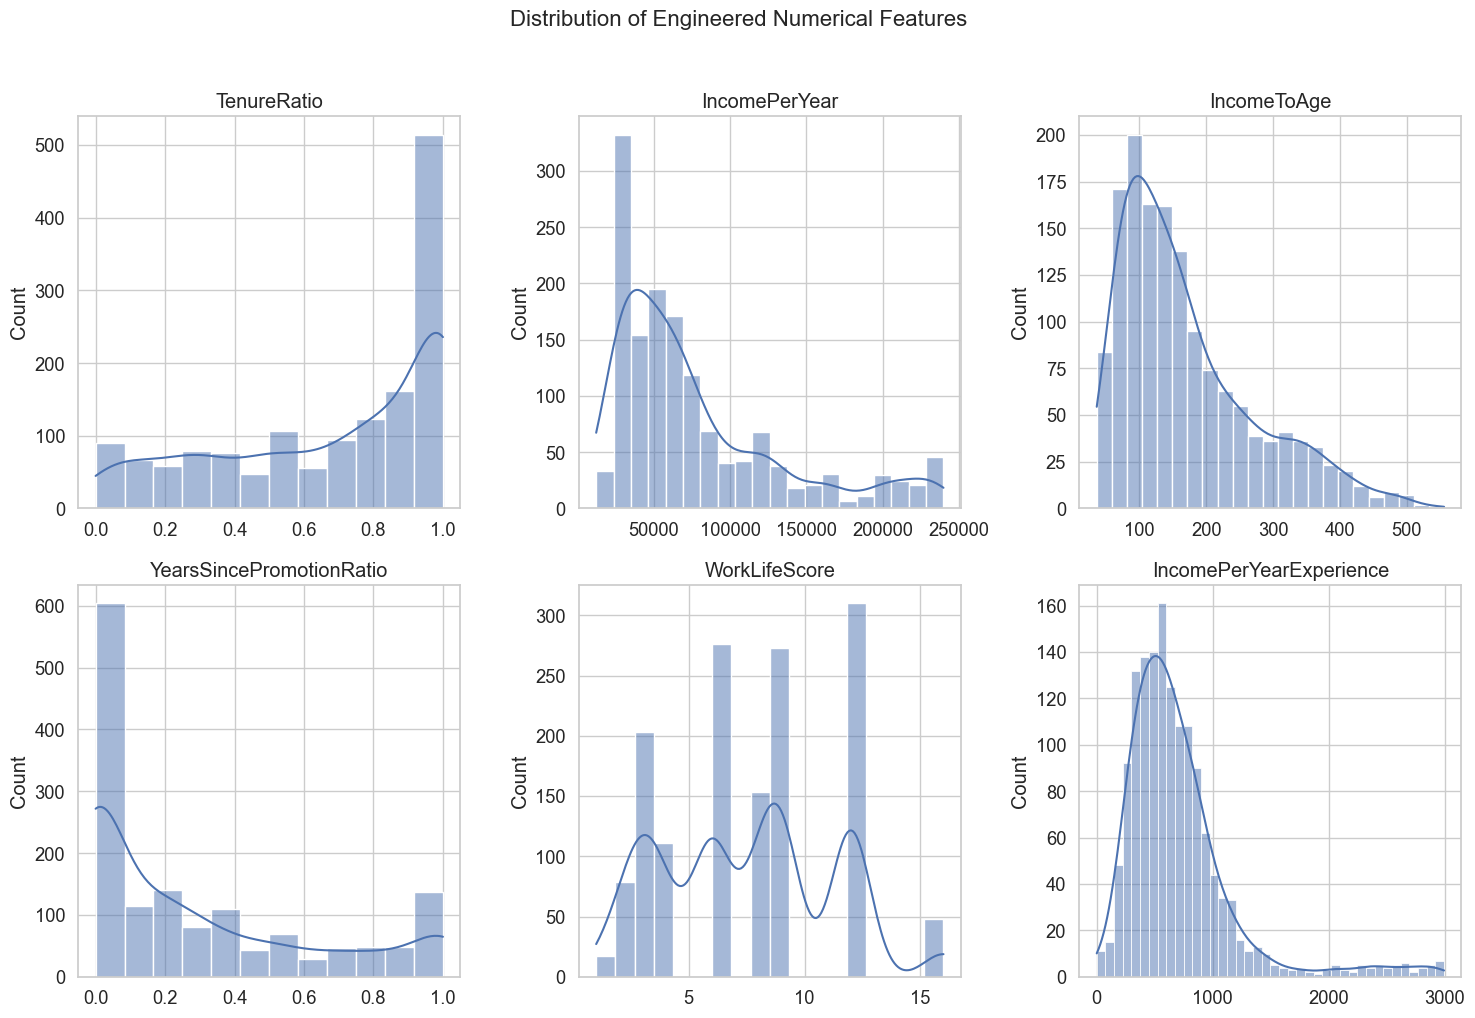

In [197]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
plt.suptitle('Distribution of Engineered Numerical Features', fontsize=16, y=1.02)
for i, col in enumerate(engineered_cols):
    sns.histplot(df_analysis[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

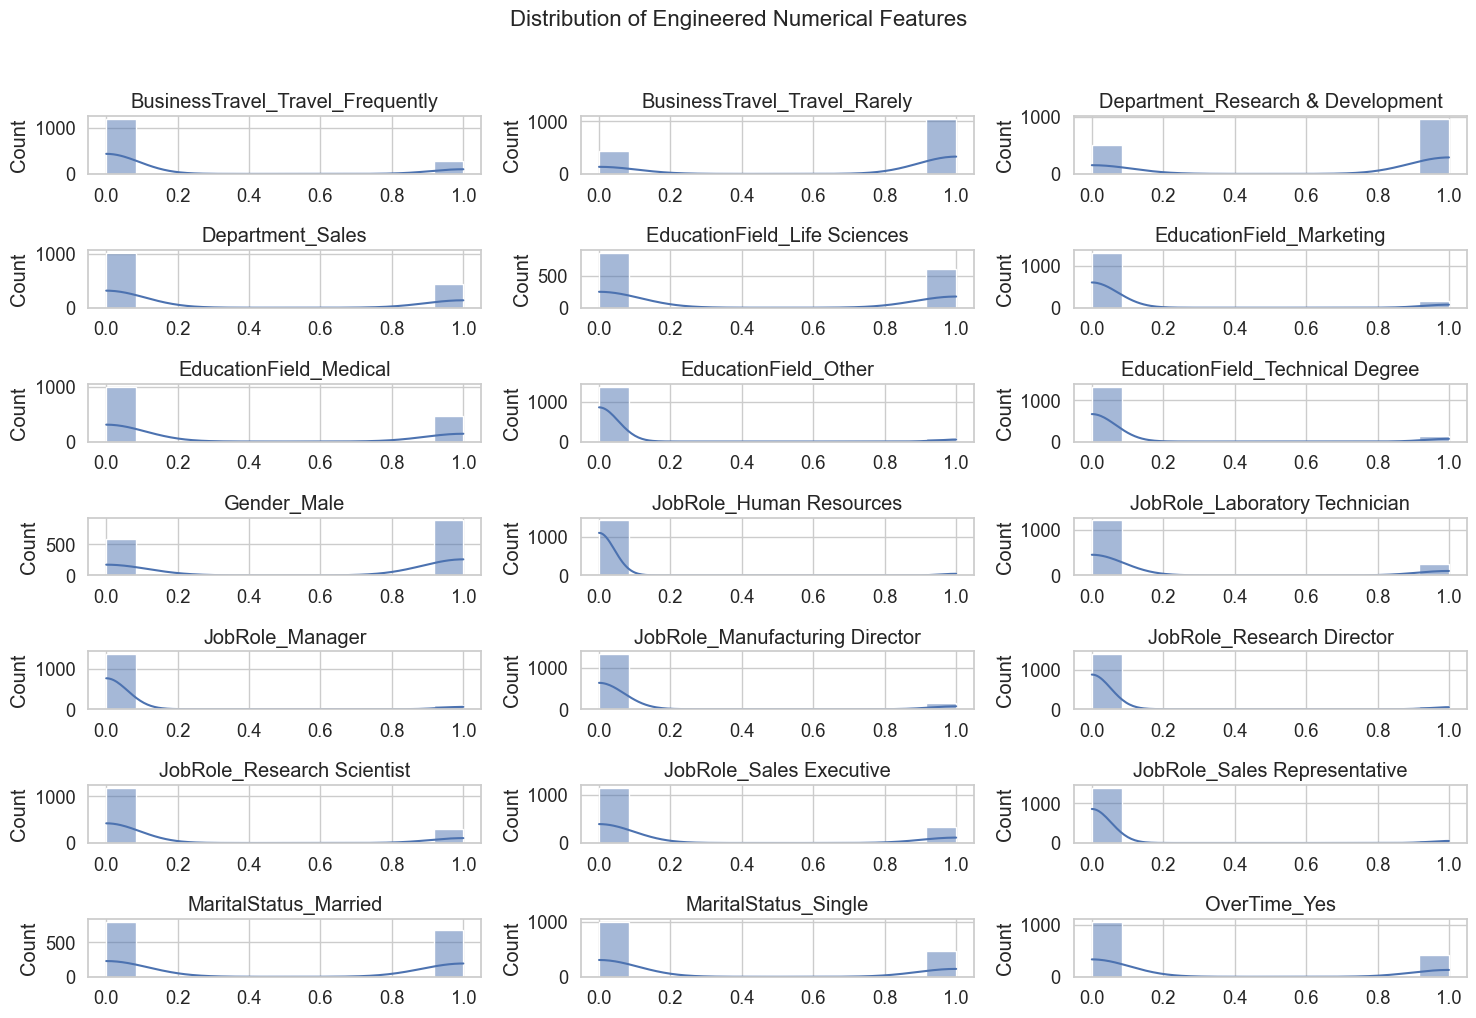

In [198]:
fig, axes = plt.subplots(7, 3, figsize=(15, 10))
axes = axes.flatten()
plt.suptitle('Distribution of Engineered Numerical Features', fontsize=16, y=1.02)
for i, col in enumerate(encoded_cols):
    sns.histplot(df_analysis[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

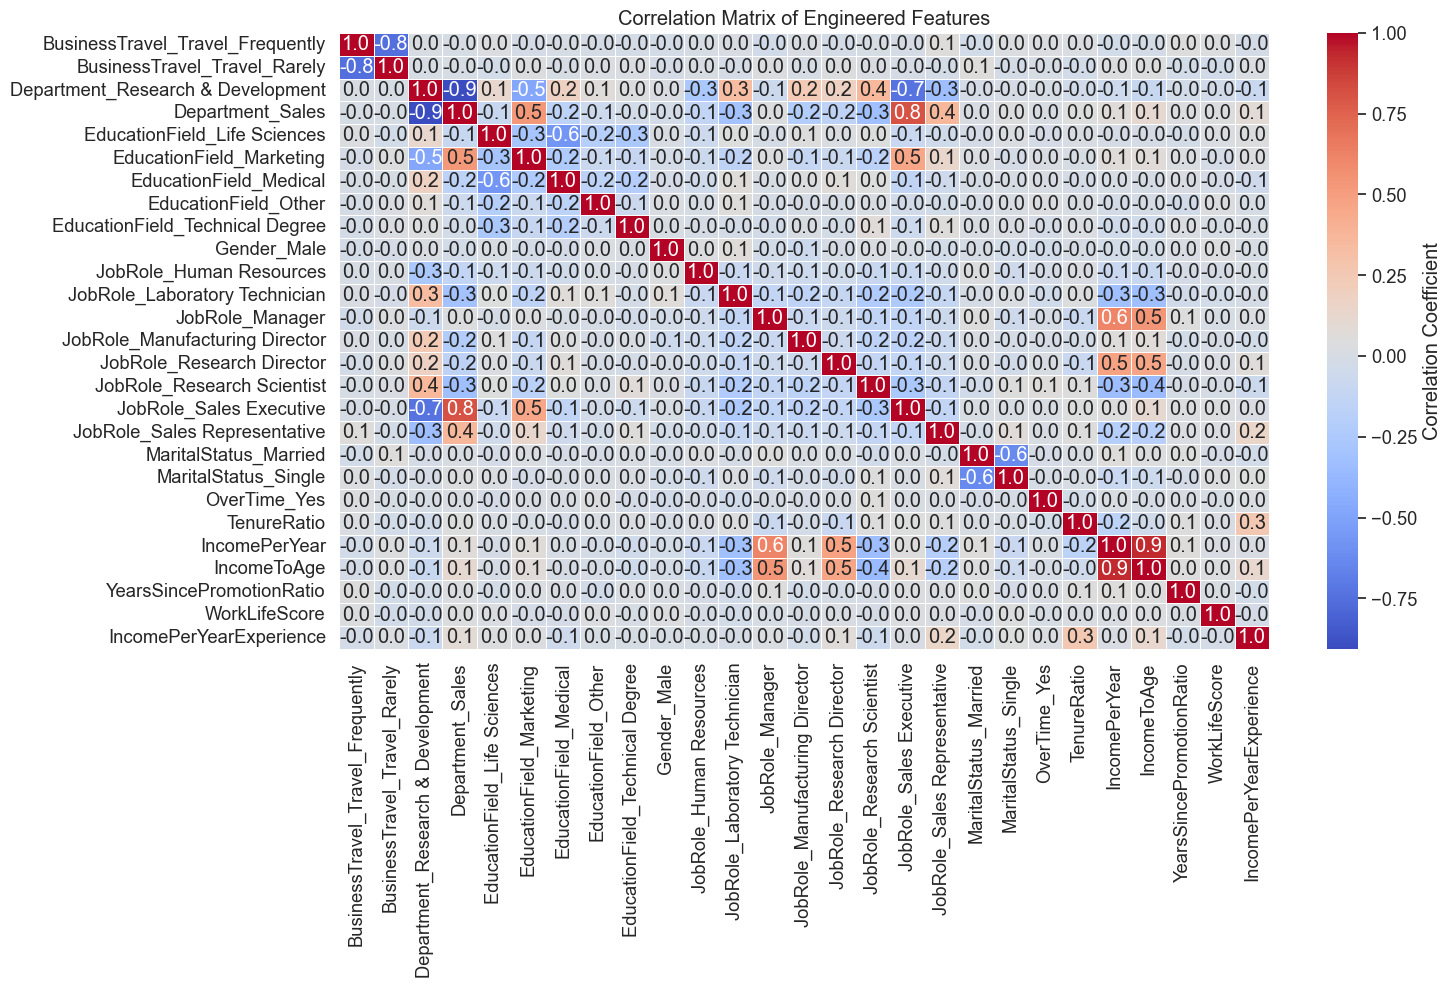

In [199]:
# Calculate the correlation matrix
corr_matrix = df_analysis[analysis_cols].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Engineered Features')
plt.show()

In [200]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
neg = (y == 0).sum()
pos = (y == 1).sum()
spw = neg / pos
model = XGBClassifier(
    n_estimators=500,
    max_depth=20,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    scale_pos_weight=spw,
    random_state=42
)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.854875283446712

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.58      0.37      0.45        71

    accuracy                           0.85       441
   macro avg       0.73      0.66      0.68       441
weighted avg       0.84      0.85      0.84       441



In [209]:
import pickle

# Save Model
with open("employee_attrition_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
print("Model saved as employee_attrition_model.pkl")

Model saved as employee_attrition_model.pkl


In [201]:
model_name = "xgb_attrition_model"

In [202]:
df.to_csv("cleaned_dataset.csv", index=False)

In [204]:
import mlflow
import mlflow.sklearn
import joblib
from sklearn.metrics import roc_auc_score , recall_score , precision_score , f1_score

In [205]:
mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("employee_attrition_exp")

<Experiment: artifact_location='file:///c:/content/mlruns/458475642926882017', creation_time=1764622513663, experiment_id='458475642926882017', last_update_time=1764622513663, lifecycle_stage='active', name='employee_attrition_exp', tags={}>

In [206]:
with mlflow.start_run(run_name='Register_model') as run:
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("n_estimators", 500)
    mlflow.log_param("max_depth", 20)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("subsample", 0.9)
    mlflow.log_param("colsample_bytree", 0.9)
    mlflow.log_param("scale_pos_weight", spw)
    mlflow.log_param("smote_used", "True")


    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred, zero_division=0))
    mlflow.log_metric("recall", recall_score(y_test, y_pred, zero_division=0))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred, zero_division=0))


    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba))
    except:
        pass
    report = classification_report(y_test, y_pred, output_dict=True)
    pd.DataFrame(report).to_csv("classification_report.csv")
    mlflow.log_artifact("classification_report.csv")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    joblib.dump(model, "xgb_attrition_model.joblib")
    mlflow.log_artifact("xgb_attrition_model.joblib")

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="xgb_attrition_model",
        registered_model_name=model_name,
        signature=mlflow.models.infer_signature(X_train_res, model.predict(X_train_res))
    )
    mlflow.log_artifact("cleaned_dataset.csv", artifact_path="dataset")
    print("Run logged:", run.info)

c:\Users\mahmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/01 23:20:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run logged: <RunInfo: artifact_uri='file:///c:/content/mlruns/458475642926882017/4fe98a7ef543495aaa4dc1c559e05e7a/artifacts', end_time=None, experiment_id='458475642926882017', lifecycle_stage='active', run_id='4fe98a7ef543495aaa4dc1c559e05e7a', run_name='Register_model', start_time=1764624052911, status='RUNNING', user_id='mahmo'>


Registered model 'xgb_attrition_model' already exists. Creating a new version of this model...
Created version '4' of model 'xgb_attrition_model'.


In [207]:
from mlflow.tracking import MlflowClient
client = MlflowClient()
version_to_promote = 1

In [208]:
client.transition_model_version_stage(
    name=model_name,
    version=1,
    stage="Production",
    archive_existing_versions=True
)
print(f"Model '{model_name}' Version {version_to_promote} successfully transitioned to 'Production'.")

C:\Users\mahmo\AppData\Local\Temp\ipykernel_196\1351204744.py:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


Model 'xgb_attrition_model' Version 1 successfully transitioned to 'Production'.
